# Medical Imaging

==============================================================================================
## Practicum 1: Computed Tomography Image Reconstruction
==============================================================================================

In this practicum, you will (1) simulate a simple phantom slice image, (2) apply Radom forward transformation to simulate the computed tomography (CT) projections over an slice (i.e. sinograms) and (3) reconstruct the original phantom intensity values using different image reconstruction algorithms.  

### Aims:
- Understand the principles of CT image reconstruction using a fan beam geometry with the aid of ``skimage``.
- Be able to generate image projections (i.e. sinograms).
- Reconstruct slices from simple and more complex objects (i.e. Shepp–Logan phantom) using back projection and iterative methods.
- Analyse and compare reconstructed data with ground truth data.
- Observe the difference between ideal (noise free) and noisy image reconstruction.

In [8]:
%matplotlib inline

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import radon

### 2.1 Create a simple and homogeneous phantom (1.5 points)

Create a 2D simple phantom which contains a fake lesion as shown below:

<img src='images_4_notebook/SimplePhantom.png' width="200">

- Phantom size: 256 x 256 pixels.
- Phantom must contain 3 tissues:
    - Background = 0 pixel intensity value
    - Tissue 1 = 1 (radius = 100 pixels)
    - Tissue 2 (lesion) = 2 (radius = 5 pixels)
    
Help: To create the circunferences, you can use the function ``create_circular_mask``, or define your own function. The lesion could be located in any position within the phantom.

Once constructed, plot the original phantom and a pixel intensity (horizontal) profile along the lesion. Always remember to include the units of the axis when ploting a graph.

In [4]:
def create_circular_mask(h, w, center=None, radius=None):

    if center is None: # use the middle of the image
        center = (int(w/2), int(h/2))
    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center <= radius
    return mask
# https://newbedev.com/how-can-i-create-a-circular-mask-for-a-numpy-array

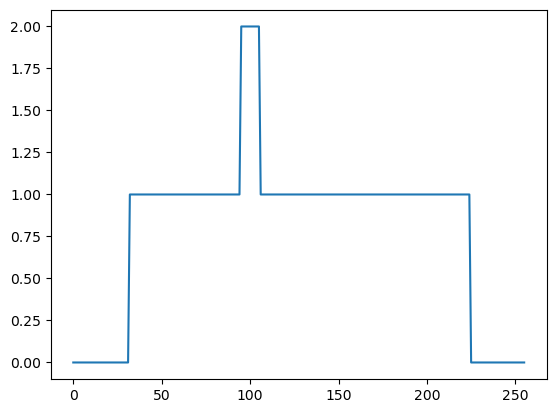

In [8]:
# Create a black square background image
phantom = np.zeros((256, 256))
# Create the circular mask for the tissue with radius 100
tissue_1 = create_circular_mask(256, 256, radius=100)
# Create the circular mask for the lesion
lesion = create_circular_mask(256, 256, center=(100,100), radius=5)
# Set the tissue value to 1
phantom[tissue_1] = 1
# set the lesion value to 2
phantom[lesion] = 2
# show pixel intensity horizontally across midsection of the phantom
plt.plot(phantom[100,:])

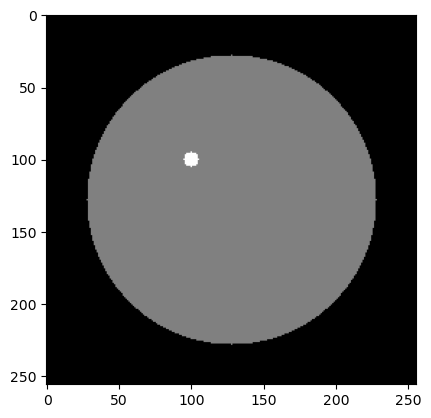

In [9]:
plt.imshow(phantom, cmap='gray')

### 2.2 Create the projections of the phantom (2.5 points)

Generate the projections of the previously generated phantom using the ``radon`` transform from ``skimage.transform``. Play with the different parameters to optimise sinogram. Then, show the sinogram of the projections.

In this section, considered the following 2 approches:

``A``. Use different number of projections (i.e. 4, 20, 50, 100, 200, 300, 360) considering that in all cases the simulated projections cover the 360º. For example, 100 projections are taken in the range from 0º to 360º.

``B``. Use different ranges of angles (i.e. 4º, 20º, 50º, 100º, 200º, 300º, 360º) equally distributed.  For instance, 100 projections are taken in a range of 100º.

``Questions``: What is the effect of increasing/decrasing the number of proyections? Can you comment on the difference between approach A and B?

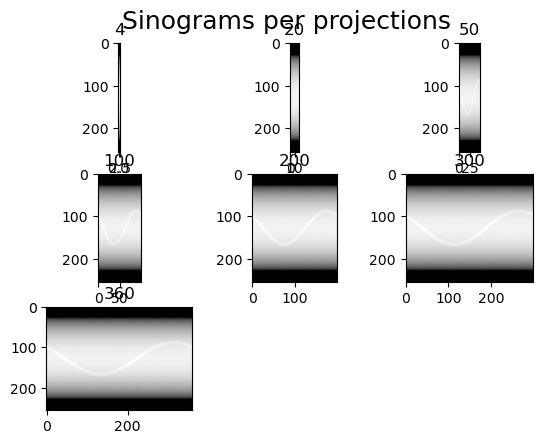

In [27]:
# insert your code here
angles=360
sinograms_proj = []
numbers = [4, 20, 50, 100, 200, 300, 360]
plt.suptitle("Sinograms per projections", fontsize=18, y=0.95)
fig.tight_layout()
# loop through the length of tickers and keep track of index
for n, n_proj in enumerate(numbers):
    # add a new subplot iteratively
    ax = plt.subplot(3, 3, n + 1)
    
    projection_angles = np.arange(0, angles, angles/n_proj)
    sinogram = radon(phantom, theta=projection_angles)
    sinograms_proj.append(sinogram)
    ax.imshow(sinogram, cmap='gray')

    # chart formatting
    ax.set_title(n_proj)
    ax.set_xlabel("")
#Inreasing the number of projections approximates the sinogram to the original phantom. The more projections the more approximate to reality
# The difference between A and B is that in A we are takind projections from different angles and in case B we are taking projections from one angle at a time.
#In this case B the projectionsare taking from every angle, conseqently the result in A and B is the same


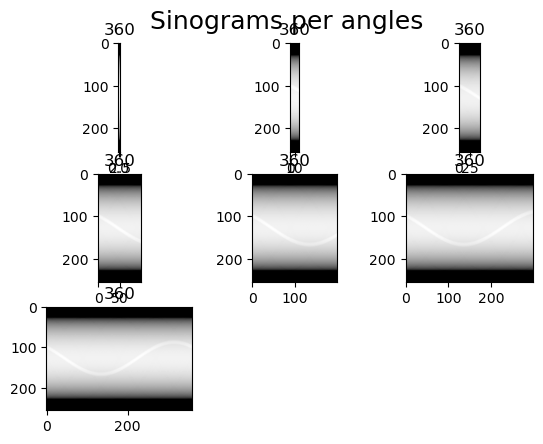

In [34]:
# insert your code here
angles= [4, 20, 50, 100, 200, 300, 360]
sinograms_angles = []

plt.suptitle("Sinograms per angles", fontsize=18, y=0.95)
fig.tight_layout()
# loop through the length of tickers and keep track of index
for n, angle in enumerate(angles):
    # add a new subplot iteratively
    ax = plt.subplot(3, 3, n + 1)
    projection_angles = np.arange(0, angle, 1)
    sinogram = radon(phantom, theta=projection_angles)
    sinograms_angles.append(sinogram)
    # filter df and plot ticker on the new subplot axis
    ax.imshow(sinogram, cmap='gray')

    # chart formatting
    ax.set_title(n_proj)
    ax.set_xlabel("")

### 2.3 Reconstruction with Filtered Back Projection (FBP) (2.5 points)

FBP is one of the most simple reconstruction methods to reconstruct images in CT. Explore the ``iradon`` from ``skimage.transform`` using the different filters available (Ramp filter (default), Shepp-logan, Cosine, Hamming, Hann).

Then, show the original and reconstructed images of the phantom.

Explore the two approches (A and B) described previously.

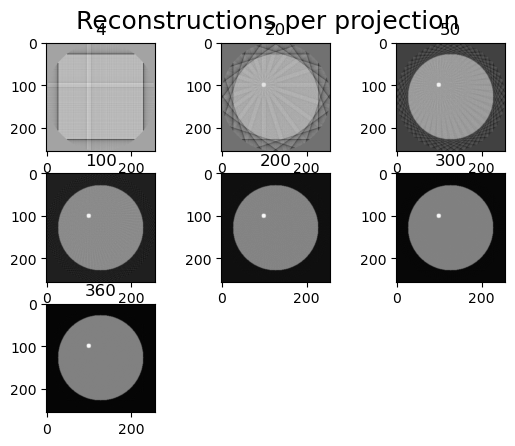

In [32]:
reconstruction_filter = 'ramp'

plt.suptitle("Reconstructions per projection", fontsize=18, y=0.95)
fig.tight_layout()
# loop through the length of tickers and keep track of index
for n, sinogram in enumerate(sinograms_proj):
    # add a new subplot iteratively
    ax = plt.subplot(3, 3, n + 1)
    n_proj = numbers[n]
    projection_angles = np.arange(0, angle, angle/n_proj)
    reconstruction = iradon(sinogram, theta=projection_angles, filter_name=reconstruction_filter)
    #sinograms_angles.append(sinogram)
    # filter df and plot ticker on the new subplot axis
    ax.imshow(reconstruction, cmap='gray')

    # chart formatting
    ax.set_title(n_proj)
    ax.set_xlabel("")

### 2.4 Compare the reconstructed signals (1.5 points)

Make use of the ``matplotlib`` to compare the original and reconstructed signals. In order to do so, make a single plot with the different pixel intensity profiles of the lesion (as done in 2.1). Then, discuss the results.

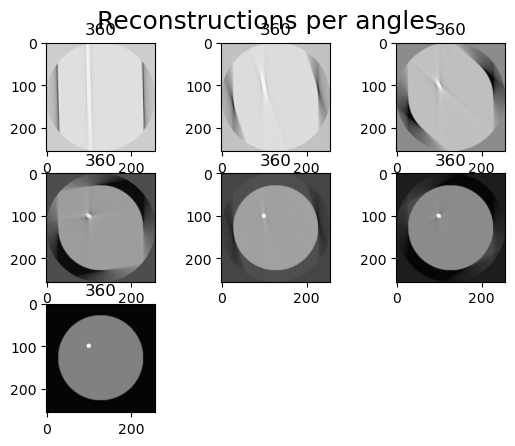

In [35]:
reconstruction_filter = 'ramp'

plt.suptitle("Reconstructions per angles", fontsize=18, y=0.95)
fig.tight_layout()
# loop through the length of tickers and keep track of index
for n, sinogram in enumerate(sinograms_angles):
    # add a new subplot iteratively
    ax = plt.subplot(3, 3, n + 1)
    projection_angles = np.arange(0, angles[n], 1)
    reconstruction = iradon(sinogram, theta=projection_angles, filter_name=reconstruction_filter)
    #sinograms_angles.append(sinogram)
    # filter df and plot ticker on the new subplot axis
    ax.imshow(reconstruction, cmap='gray')

    # chart formatting
    ax.set_title(n_proj)
    ax.set_xlabel("")
    
    # As we can see, the increase of pixel intensity results in increasing the clarity of the image.

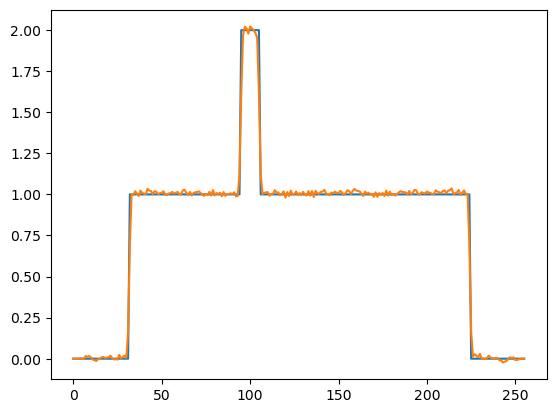

In [38]:
# insert your code here
plt.plot(phantom[100,:])
plt.plot(reconstruction[100,:])

### 2.5 Reconstructing noisy sinograms (2 points)

Add Poison noise (``np.random.poisson``; perhaps with lam = 10) to your previous sinograms and reconstruct the phantom images with the different filters. Plot the reconstruction image and the intensity profile along the lession. Then, comment on the effects of the filters on the reconstructed phatom images.

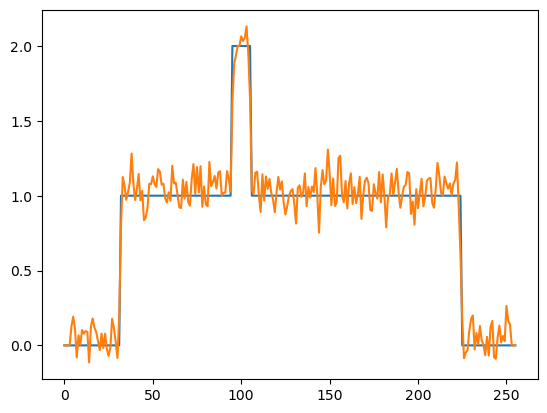

In [40]:
# insert your code here
noise = np.random.poisson(10, sinogram.shape)
noisy_sinogram = sinogram + noise
noisy_recon = iradon(noisy_sinogram, theta=projection_angles, filter_name='ramp')

plt.plot(phantom[100,:])
plt.plot(noisy_recon[100,:])

#The filters help to reduce the noise and clarify the image, reducing the scattering

### 2.6 BONUS (OPTIONAL)

If you enjoyed the practicum and want to do more, I suggest you start again (perhaps with certain number of projections) with the Sheep-logan phantom as we discussed in the theory session.


In [6]:
from skimage.data import shepp_logan_phantom

image = shepp_logan_phantom()

# insert your code here